# STUDY GROUP - M01S11
## Multiple Regression

### Objectives
You will be able to:
* Understand danger of multicolinearity and how to check for it
* Understand benefit of and how to perform feature scaling and normalization 
* Understand need for and processs to deal with categorical features with label encoding/one-hot encoding 
* Explain why it's always important to split your data into training and testing sets to validate that your model works well on "new" data
    1. Understand how k-fold cross validation is a great way to run multiple train-test splits on your data set to maximize the quality of your predictions for a given set of data

### ACTIVATION ACTIVITY (5-7 min)

*What* are the assumptions of linear regression? *How* do we check for them? *Why* do these assumptions matter?
- Linear relationship
- Multivariate normality
- No or little multicollinearity
- Homoscedasticity

In [6]:
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

boston = load_boston()
data = boston.data
features = boston.feature_names
target = boston.target
df = pd.DataFrame(data, columns=features)
df['target'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


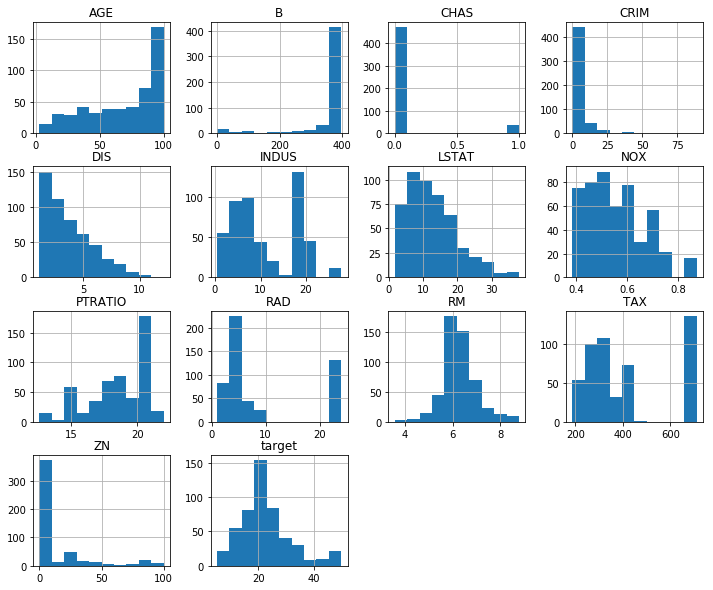

In [32]:
df.hist(figsize=(12,10));

In [31]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [39]:
# set categorical and continuous features for separate pre-processing  
feat_cont = df.drop('CHAS', axis=1)
feat_cat = df['CHAS']
df['CHAS'] = df.CHAS.astype('category')

In [40]:
df.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD         float64
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
target      float64
dtype: object

In [4]:
# ORIGNIAL REGRESSION
import statsmodels.api as sm
# put data into separate variables
X = df.drop('target', axis=1)
y = df.target
# create statsmodels OLS and view summary
ols = sm.OLS(y, X)
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.3
Date:                Fri, 06 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:56:07   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3128.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multicollinearity

* The interpretation of a regression coefficient is that it represents the average change in the dependent variable for each 1 unit change in a predictor, assuming that all the other predictor variables are kept constant. And it is exactly because of that reason that multicollinearity can cause problems. Correlation is a problem because it indicates that changes in one predictor are associated with changes in another one as well. Because of this, the estimates of the coefficients can have big fluctuations as a result of small changes in the model. As a result, you may not be able to trust the p-values associated with correlated predictors.

  - correlations = data.corr() method #high correlation > 0.75 generally
  - sns.heatmap(correlations);

SHOW/DO: 
* make heatmap(df.corr()) to show multicollinearity

* DISCUSSION: How to deal with identified multicollinearity
    
* re-run regression with non-multicollinear data

In [12]:
import seaborn as sns

# scatter matrix
# pd.plotting.scatter_matrix(df, figsize=(20, 20), grid=True)
# plt.show()

# heatmap with df.corr()
df.corr()[df.corr() > 0.7]
# sns.heatmap(df.corr())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INDUS,NaN,NaN,1.000000,NaN,0.763651,NaN,NaN,NaN,NaN,0.720760,NaN,NaN,NaN,NaN
CHAS,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,NaN,0.763651,NaN,1.000000,NaN,0.73147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RM,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,NaN,0.731470,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
RAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.910228,NaN,NaN,NaN,NaN
TAX,NaN,NaN,0.720760,NaN,NaN,NaN,NaN,NaN,0.910228,1.000000,NaN,NaN,NaN,NaN


In [30]:
# Generally the cutoff for collinear features is somewhere between 0.7 and 0.8. 
# Based on the correlation map above, which features should we drop?
to_drop = ['TAX', 'NOX']
X2 = df.drop(to_drop, axis=1)
y2 = df.target
# create statsmodels OLS and view summary
ols2 = sm.OLS(y2, X2)
results2 = ols.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.3
Date:                Wed, 11 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:21:58   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3128.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Feature Scaling & Normalization

https://scikit-learn.org/stable/modules/preprocessing.html

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html

Often, your dataset will contain features that largely vary in magnitudes. If we leave these magnitudes unchanged, coefficient sizes will largely fluctuate in magnitude as well. This can give the false impression that some variables are less important than others.

**Log transformation**

Log transformation is a very useful tool when you have data that clearly does not follow a normal distribution. log transformation can help reducing skewness when you have skewed data, and can help reducing variability of data. 


**Min-max scaling**

When performing min-max scaling, you can transform x to get the transformed $x'$ by using the formula:

$$x' = \dfrac{x - \min(x)}{\max(x)-\min(x)}$$

This way of scaling brings values between 0 and 1

**Standardization**

When 

$$x' = \dfrac{x - \bar x}{\sigma}$$

x' will have mean $\mu = 0$ and $\sigma = 1$

Note that standardization does not make data $more$ normal, it will just change the mean and the standard error!

**Mean normalization**
When performing mean normalization, you use the following formula:
$$x' = \dfrac{x - \text{mean}(x)}{\max(x)-\min(x)}$$

The distribution will have values between -1 and 1, and a mean of 0.

**Unit vector transformation**
 When performing unit vector transformations, you can create a new variable x' with a range [0,1]:
 
$$x'= \dfrac{x}{{||x||}}$$


Recall that the norm of x $||x||= \sqrt{(x_1^2+x_2^2+...+x_n^2)}$

SHOW 

Let's transform this skewed data with different Power Transformer techniques and evaluate which technique was more effective.

* plot histogram by feature to identify non-normally distributed features
* transform data 
* show plot with original and normalized data, compare/contrast shape, values
* evaluate normality with Jacque-Bera, QQ plot, etc.
* check skweness/kurtosis if previous techniques not sufficient

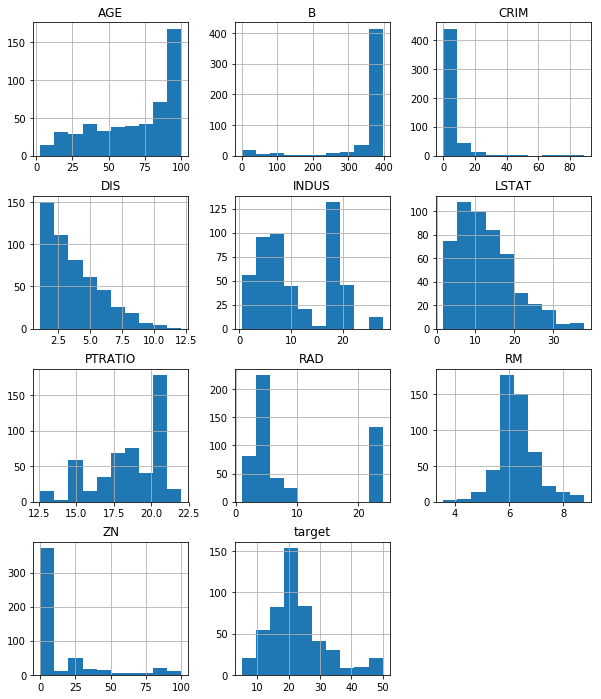

In [58]:
feat_cont = feat_cont.drop(['NOX', 'TAX'], axis=1)
feat_cont.hist(figsize=(10,12));

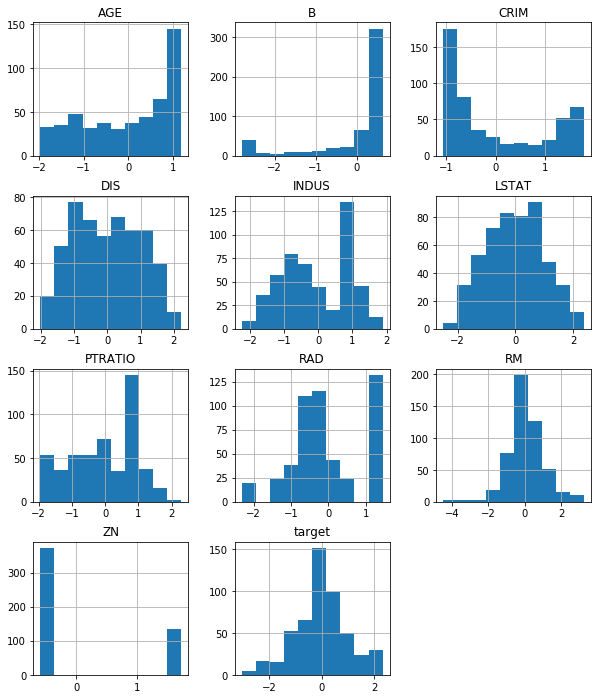

In [59]:
from sklearn import preprocessing
# normalize and scale data with power transform
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
# X_train_pt = pt.fit_transform(X_train)
# X_test_pt = pt.transform(X_test)

# X_train_pt.hist(figsize=(10,12));
df_pt = pt.fit_transform(feat_cont)
df_pt = pd.DataFrame(df_pt, columns=feat_cont.columns) # power transformer turns pandas series in numpy arrays. Must convert back to DataFrame for df.hist()
df_pt.hist(figsize=(10,12));

In [45]:
# kolmogorov-smirnow test for normality
from scipy import stats

# for feat in df_pt:
#     stats.kstest(feat, 'norm')
stats.kstest(df.CRIM, 'norm')

KstestResult(statistic=0.5025212984276741, pvalue=0.0)

### Label Encoding/One-hot Encoding for Categorical Features

* How to identify categorical features:
    1. .info() - look for 'str' data types
    2. .describe()
    3. .scatter() - categorical features will appear historgram-like rather than a cluster of dots

In [60]:
# One hot encoding 
# feat_cat_gd = pd.get_dummies(feat_cat, prefix='CHAS') # NOT NECESSARY as only 2 categories
# feat_cat_gd
# concat feat_cont and feat_cat_gd
all_feat = pd.concat([df_pt.drop('target', axis=1), feat_cat, df_pt.target], axis=1)
all_feat.head()

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,CHAS,target
0,-1.056151,1.605270,-1.523776,0.441377,-0.212875,0.443907,-2.314674,-1.408874,0.632757,-1.257099,0.0,0.317598
1,-0.999901,-0.599954,-0.443938,0.225621,0.314385,0.796950,-1.448933,-0.518692,0.632757,-0.334422,0.0,0.051764
2,-0.999953,-0.599954,-0.443938,1.268348,-0.363383,0.796950,-1.448933,-0.518692,0.502065,-1.543453,0.0,1.293389
3,-0.986675,-0.599954,-1.564275,1.019336,-0.891929,1.144611,-0.909551,-0.076443,0.559404,-1.934975,0.0,1.189010
4,-0.894461,-0.599954,-1.564275,1.218056,-0.608476,1.144611,-0.909551,-0.076443,0.632757,-1.161275,0.0,1.409977


In [61]:
X3 = all_feat.drop('target', axis=1)
y3 = all_feat.target
# create statsmodels OLS and view summary
ols3 = sm.OLS(y2, X2)
results3 = ols.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.3
Date:                Wed, 11 Sep 2019   Prob (F-statistic):               0.00
Time:                        12:07:56   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3128.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

SHOW/DO:

* identify & one-hot encode categorical features
* re-run model with encoded categorical features and scaled continuous features

### k-fold Cross Validation with Train/Test Split

* Underfitting & Overfitting - An overfit model is not generalizable and will not hold to future cases. An underfit model does not make full use of the information available and produces weaker predictions then is feasible.

$r_{i,train} = y_{i,train} - \hat y_{i,train}$ 

$r_{i,test} = y_{i,test} - \hat y_{i,test}$ 

To get a summarized measure over all the instances in the test set and training set, a popular metric is the **(Root) Mean Squared Error**:

RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2}$

MSE = $\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$

Again, you can compute these for both the traing and the test set. A big difference in value between the test and training set (R)MSE is an indication of overfitting.

When using train-test-split, random samples of the data are created for the training and the test set. The problem with this is that the training and test MSE strongly depend on how the training and test sets were created. Let's see how this happens in practice using the auto-mpg data.

**K-Fold Cross Validation** expands on the idea of training and testing splits by splitting the entire dataset into {K} equal sections of data. We'll then iteratively train {K} linear regression models on the data, with each linear model using a different section of data as the testing set, and all other sections combined as the training set.

We can then average the individual results frome each of these linear models to get a Cross-Validation MSE. This will be closer to the model's actual MSE, since "noisy" results that are higher than average will cancel out the "noisy" results that are lower than average.

In [62]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(ols3, X3, y3, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(ols3, X3, y3, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(ols3, X3, y3, cv=20, scoring="neg_mean_squared_error"))

TypeError: Cannot clone object '<statsmodels.regression.linear_model.OLS object at 0x1c1f56c9b0>' (type <class 'statsmodels.regression.linear_model.OLS'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

SHOW/DO:
* re-run normalized, encoded, non-collinear model with cross-validation